In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import time

import src.mod_models as mm
import src.mod_evolution as me
import src.mod_visualization as mv
import src.mod_stimulation as ms
from src.mod_models import logger
import inputools.Trajectory as it
from tools.utils import clf

%load_ext autoreload
%autoreload 2

2023-12-02 16:06:58 | logger set up
2023-12-02 16:06:58 | cache path = Users/doki/lab/cache/
2023-12-02 16:06:58 | OS: linux


@toolpack


## Inputs

In [12]:
layer = it.InputLayer(N=9, kind='hd', sigma=0.01)
logger.info(layer)

2023-11-29 19:21:58 | InputLayer(N=9, kind=hd, sigma=0.01)


Layer(N=18 [9, Nz=9], kind=hd)


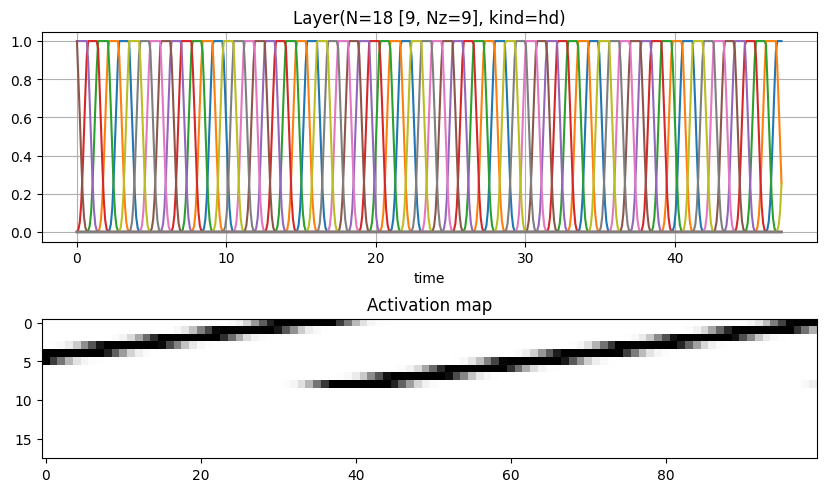

In [8]:
layer = it.HDLayer(N=9, Nz=9, sigma=0.01)
logger.info(layer)
layer.plot(Tmax=15*np.pi, size=500)

2023-12-01 16:12:07 | Layer(N=9 [9, Nz=0], kind=place)


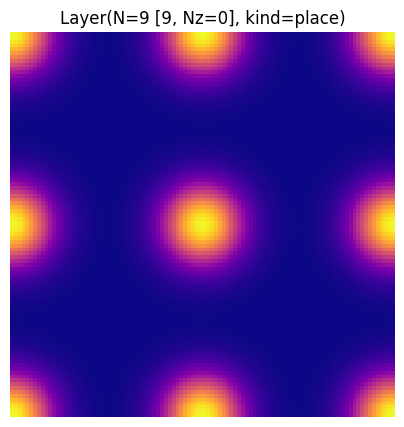

In [2268]:
layer = it.PlaceLayer(N=9, sigma=0.01)
logger.info(layer)

layer.plot(kind=None, size=200,
          sigmoid_beta=0.3, sigmoid_alpha=0.5)

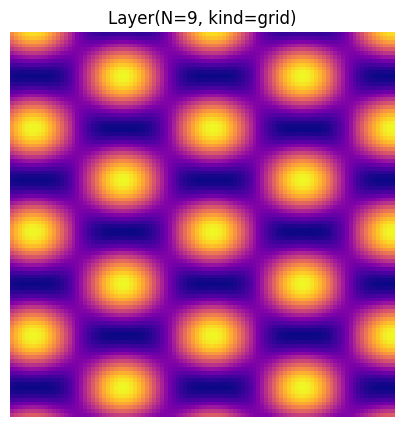

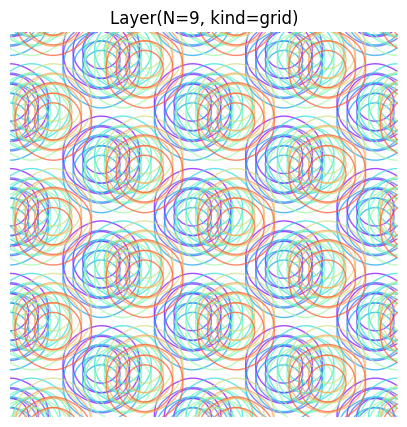

In [913]:
layer = it.GridLayer(N=9, sigma=6., 
                     scale=np.array([1.47, 0.52]))
layer.plot(size=200, kind=None, 
           sigmoid_beta=1, sigmoid_alpha=0.)
layer.plot(size=200, kind='contour')

## Simulation I

#### Models

In [5]:
model = mm.RateNetwork3(N=N, Nj=Nj, 
                       gain=4,
                       bias=2,
                       lr=1,
                       lr_beta=1.,
                       rule='hebb',
                       wff_std=0.01,
                       wff_min=0.01,
                       wff_max=3.,
                       wff_const=7,
                       wff_tau=10,
                       loc_magnitude=2)
logger.info(model)

2023-11-29 18:18:10 | RateNetwork3(N=4, Nj=6, rule=hebb) [oyfjj]


###### Load model from evolution

In [3]:
genome = me.load_best_individual()
genome

2023-11-24 15:02:47 | Available files in /Users/daniekru/Research/lab/PCNN/cache:
2023-11-24 15:02:47 | 0: best_2239_r3.json
2023-11-24 15:02:47 | 1: best_2220_r3.json
2023-11-24 15:02:47 | 2: best_2311_1657_r3.json
2023-11-24 15:02:47 | 3: best_2238_r3.json
2023-11-24 15:02:47 | 4: best_2233_r3.json
2023-11-24 15:02:47 | 5: best_2215_r3.json
2023-11-24 15:02:47 | 6: best_ind_2238.json
2023-11-24 15:02:47 | 7: best_2342_r3.json
2023-11-24 15:02:47 | 8: best_ind_2311.json
2023-11-24 15:02:47 | 9: top_ij_1.json
2023-11-24 15:02:47 | 10: best_2227_r3.json
2023-11-24 15:02:47 | 11: best_2218_r3.json
2023-11-24 15:02:47 | 12: best_2149_r3.json
2023-11-24 15:02:47 | 13: best_2226_r3.json
2023-11-24 15:02:47 | 14: best_2132_r3.json
2023-11-24 15:02:47 | 15: best_2311_1731_r3.json
2023-11-24 15:02:47 | 16: best_2411_1502_r3.json
2023-11-24 15:02:47 | 17: best_2129_r3.json
2023-11-24 15:02:47 | 18: best_2224_r3.json
2023-11-24 15:02:47 | 19: best_2213_r3.json


Choose a file:  16


2023-11-24 15:02:59 | Best individual loaded from best_2411_1502_r3.json in /Users/daniekru/Research/lab/PCNN/cache.


{'gain': 15.8,
 'bias': 1.0,
 'lr': 0.65999,
 'tau': 50.0,
 'wff_std': 0.001,
 'wff_min': 0.0,
 'wff_max': 3.0,
 'wff_tau': 132,
 'rule': 'hebb',
 'std_tuning': 0.001,
 'soft_beta': 0.1,
 'dt': 0.053,
 'N': 6,
 'Nj': 6}

In [4]:
model = mm.RateNetwork2(**genome)
logger.info(model)

2023-11-24 15:03:30 | RateNetwork2(N=6, Nj=6, rule=hebb)


#### Training

KeyboardInterrupt: 

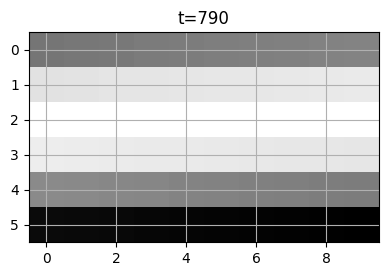

In [7]:
model.reset()


record = np.zeros((4, len(X)))
X2 = np.zeros((len(X) + 10, Nj))

for t, x in enumerate(X):
    
    model.step(x=x.reshape(-1, 1))
    record[0, t] = (model.Wff @ x.reshape(-1, 1))[0]
    record[1, t] = (model.Wff @ x.reshape(-1, 1))[1]
    record[2, t] = model.u[0]
    record[3, t] = model.u[1]
    X2[10:t+10] = X[:t]


    if t % 10 == 0:
        
        clf()
        plt.figure(figsize=(15, 6))
        plt.tight_layout()
        
        plt.subplot(221)
        plt.imshow(X2.T[:, t-10:t], cmap="Greys")
        #plt.ylim((0, 1))
        plt.title(f"{t=}")
        #plt.xlabel("time")
        plt.grid()
        
        plt.subplot(222)
        plt.axvline(0, color='black', alpha=0.3)
        plt.plot(np.flip(model.Wff[0], axis=0), range(Nj), '-b', alpha=0.4)
        plt.plot(np.flip(model.Wff[0], axis=0), range(Nj), 'ob', alpha=0.4)
        plt.plot(np.flip(model.Wff[1], axis=0), range(Nj), '-r', alpha=0.4)
        plt.plot(np.flip(model.Wff[1], axis=0), range(Nj), 'or', alpha=0.4)
        plt.title(f"Weights")
        plt.yticks(())
        plt.xlim((-5, 7))
        #plt.xlabel("intensity")
        plt.grid()
        
        plt.subplot(223)
        #plt.plot(range(t), record[0, :t])
        #plt.plot(range(t), record[1, :t])
        plt.imshow(model.Wff, cmap="plasma")
        plt.title("Input $W^{ff}$@$x$ : "+f"{record[0, t]:.3f}, {record[1, t]:.3f}")
        #plt.ylim((0, 20))
        plt.grid()
        
        plt.subplot(224)
        plt.plot(range(t), record[2, :t])
        plt.plot(range(t), record[3, :t])
        plt.title(f"$u$={np.around(model.u.T, 3)} - I={model.I_loc.T}")
        plt.ylim((0, 1.3))
        plt.grid()
        plt.pause(0.001)

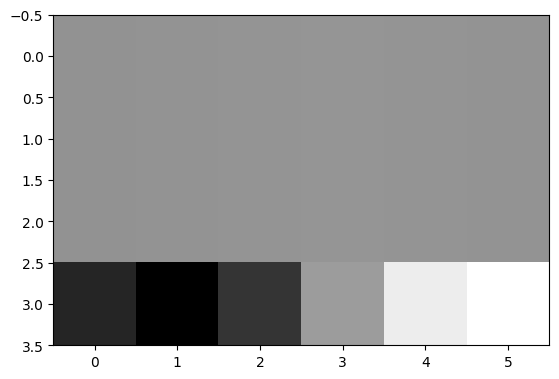

In [151]:
plt.imshow(model.Wff, cmap="Greys");

### Local stimulation

#### Supra-threshold

In [251]:
N = 5
T = 100

x = np.arange(N)
y = np.zeros((T, N))
for t in range(T):
    y[t, np.random.randint(0, N)] = 1

#### Sub-threshold

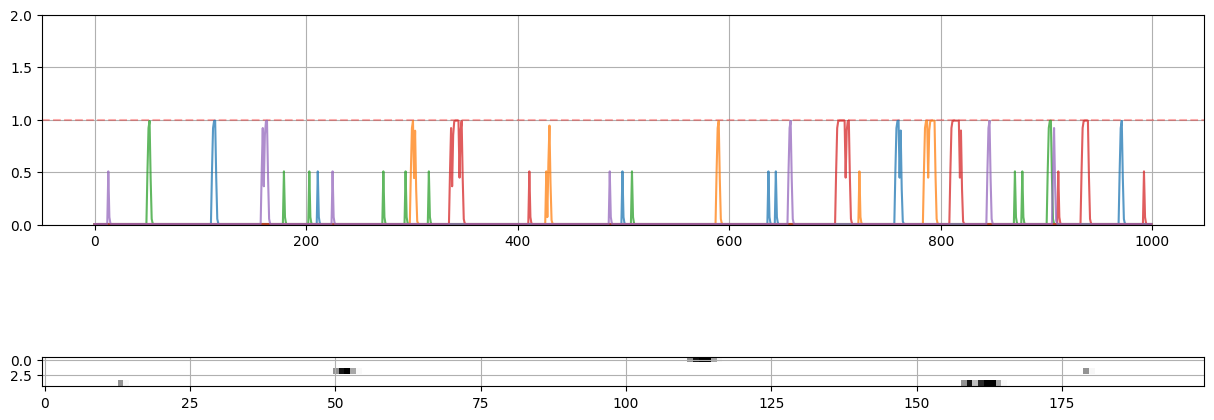

In [1057]:
def subthr(plot=True, noise=True):
    
    T = 1000
    N = 5
    thr = 1.
    u = np.ones((N, 1))*1e-8
    tau_0 = 30.
    tau = tau_0
    curr = np.zeros((N+1, 1))
    
    record = np.zeros((T, N))
    for t in range(T):
    
        p = np.array((u).flatten().tolist() + [1])
        p = p/p.sum()
        curr *= 0
        curr[np.random.choice(range(N+1), p=p, size=1)] = 1.
        u += (-u)/tau + int(noise)*np.random.normal(0., 0.1, (N, 1)) + curr[:-1]
    
        # activation
        u = 1 / (1 + np.exp(-5*(u - thr)))
    
        # adaptive threshold
        #tau += (1*u + tau_0*(1-u) - tau) / 2
        
        # record
        record[t, :] = u.flatten()
    
    if plot:
        plt.figure(figsize=(15, 6))
        plt.subplot(211)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(T), record[:, i], alpha=0.75)
        
        plt.grid()
        plt.ylim((0, 2))

        plt.subplot(212)
        plt.imshow(record[:200].T, cmap='Greys')
        plt.grid()
        plt.show()

    return record

record = subthr(plot=True, noise=0)

**Analysis**

In [1058]:
nb = 100
sum1 = np.zeros((nb, 2))
for i in tqdm(range(nb)):
    rec = subthr(plot=False)
    rec = np.where(rec > 0.4, 1, 0)
    sum1[i] = [rec.sum(axis=1).mean(), 
               (np.exp(rec.sum(axis=0))/np.exp(rec.sum(axis=0)).sum()).std()]

print("With noise")
print(f"mean (over T): {sum1.mean(axis=0)[0]:.3f}")
print(f"std (over N): {sum1.mean(axis=0)[1]:.3f}")

100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.88it/s]

With noise
mean (over T): 0.075
std (over N): 0.367


In [1059]:
nb = 100
sum1 = np.zeros((nb, 2))
for i in tqdm(range(nb)):
    rec = subthr(plot=False, noise=False)
    rec = np.where(rec > 0.4, 1, 0)
    sum1[i] = [rec.sum(axis=1).mean(), 
               (np.exp(rec.sum(axis=0))/np.exp(rec.sum(axis=0)).sum()).std()]

print("Without noise")
print(f"mean (over T): {sum1.mean(axis=0)[0]:.3f}")
print(f"std (over N): {sum1.mean(axis=0)[1]:.3f}")

100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.97it/s]

Without noise
mean (over T): 0.070
std (over N): 0.364


In [724]:
sums = []
for i in range(N):
    sums += [np.where(record[:, i] > 0.99, 1, 0).sum()]
print('no noise ', sums, sum(sums))

no noise  [0, 0, 9, 7, 10] 26


In [735]:
sums = []
for i in range(N):
    sums += [np.where(record[:, i] > 0.99, 1, 0).sum()]
print('noise ', sums, sum(sums))

noise  [3, 9, 1, 0, 5] 18


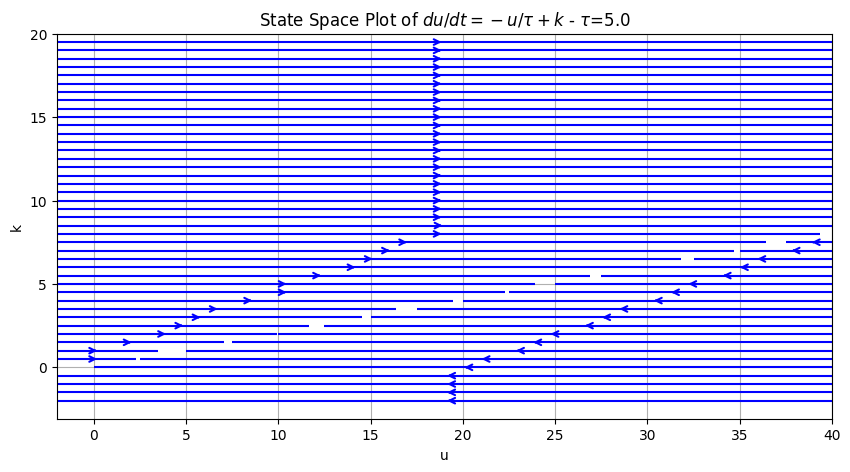

In [284]:
# Parameters
u_range = np.linspace(-2, 40, 40)
k_range = np.linspace(-2, 20, 30)

# Create a grid of u and k values
U, K = np.meshgrid(u_range, k_range)

# Time constant
tau = 5.0

# Define the ODE
dU_dt = -U/tau + K

# Plot
plt.figure(figsize=(10, 5))
plt.streamplot(U, K, dU_dt, np.zeros_like(dU_dt), density=1.5, arrowstyle='->', color='blue')
plt.xlabel('u')
plt.ylabel('k')
plt.title(f"State Space Plot of $du/dt = -u/\\tau + k$ - $\\tau$={tau}")
plt.grid(True)
plt.show()

#### Oscillatory

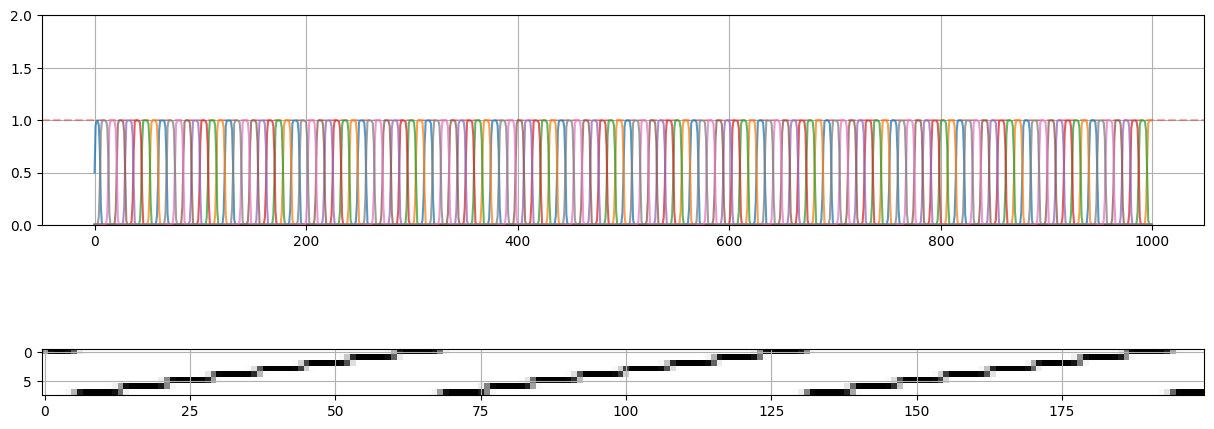

In [8]:
T = 1000
dt = 0.1
N = 8
tuning = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)

thr = 1.
u = np.ones((N, 1))*1e-8
tau_0 = 30.
tau = tau_0
curr = np.zeros((N+1, 1))

record = np.zeros((T, N))
for t in range(T):

    u += (-u)/tau + np.exp(-(np.cos(t*dt + tuning) - 1)**2/0.01)

    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # adaptive threshold
    #tau += (1*u + tau_0*(1-u) - tau) / 2
    
    # record
    record[t, :] = u.flatten()

plt.figure(figsize=(15, 6))
plt.subplot(211)
plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
for i in range(N):
    plt.plot(range(T), record[:, i], alpha=0.75)

plt.grid()
plt.ylim((0, 2))

plt.subplot(212)
plt.imshow(record[:200].T, cmap='Greys')
plt.grid()
plt.show()


#### + Lateral inhibition

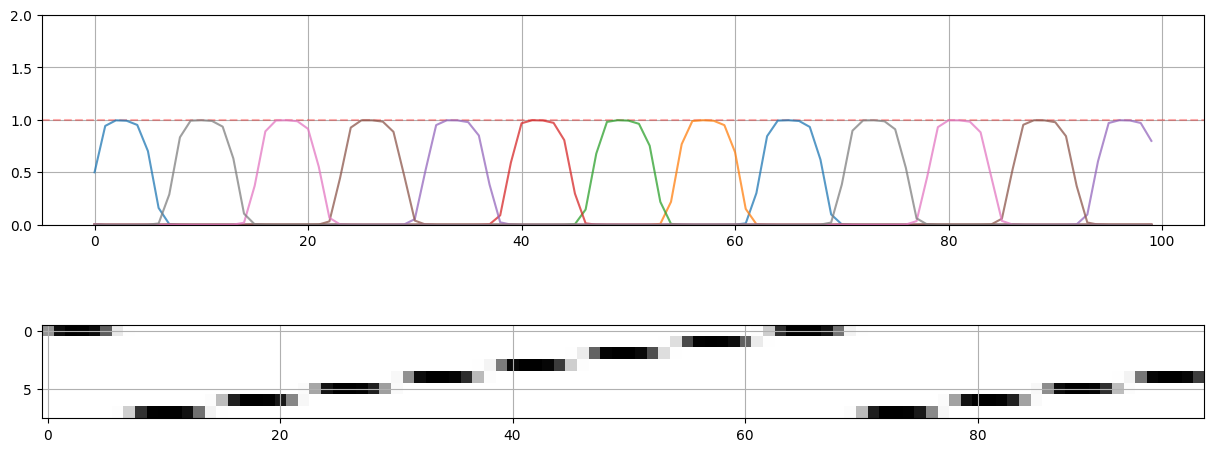

In [69]:
T = 100
dt = 0.1
N = 8
tuning = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)

thr = 1.
u = np.ones((N, 1))*1e-8
tau_0 = 30.
tau = tau_0
curr = np.zeros((N+1, 1))

# lateral
Wr = -1  * (np.ones((N, N)) - np.eye(N))

record = np.zeros((T, N))
for t in range(T):

    u += (-u)/tau + np.exp(-(np.cos(t*dt + tuning) - 1)**2/0.01) + Wr @ u

    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # adaptive threshold
    #tau += (1*u + tau_0*(1-u) - tau) / 2
    
    # record
    record[t, :] = u.flatten()

plt.figure(figsize=(15, 6))
plt.subplot(211)
plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
for i in range(N):
    plt.plot(range(T), record[:, i], alpha=0.75)

plt.grid()
plt.ylim((0, 2))

plt.subplot(212)
plt.imshow(record[:200].T, cmap='Greys')
plt.grid()
plt.show()


### Plasticity study

#### Only plasticity

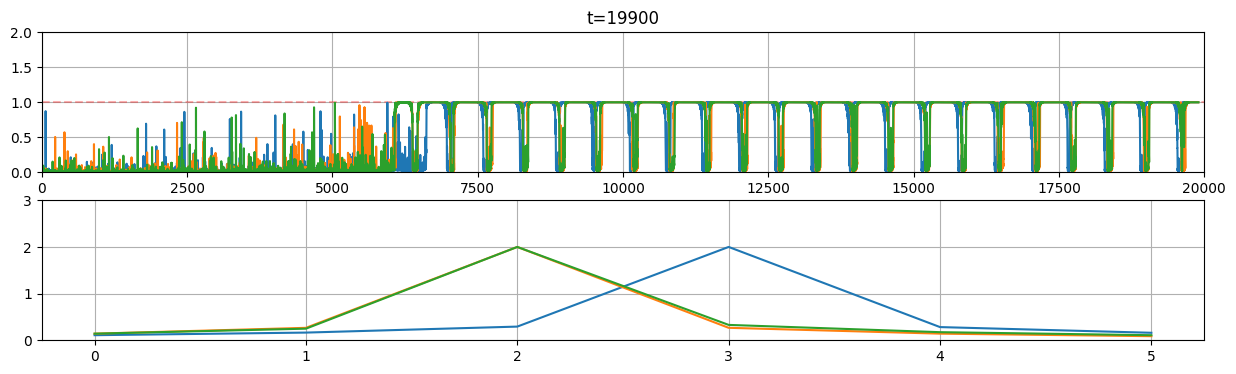

In [59]:
N = 3
T = len(X)

# neural settings
thr = 1.
u = np.ones((N, 1))*1e-8
W = np.ones((N, Nj))*1e-3
tau = 30.
lr = 0.01

# plasticity
rule = 'hebb'
beta = 10

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    u += (-u)/tau + W @ x.reshape(-1, 1) + np.random.normal(0, 0.3, size=(N, 1))**2
    
    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # plasticity
    if rule == 'hebb':
        dw = u * x
    elif rule == 'oja':
        dw = u * x - W @ (x * x)

    W += lr * dw * (np.exp(beta*W)/np.exp(beta*W).sum(axis=1, keepdims=True))

    W = W.clip(1e-3, 2e0)

    # record
    record[t] = u.flatten()

    if t % 100 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(211)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, 2))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=}")
        
        plt.subplot(212)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), W[i])

        plt.ylim((0, 3))
        plt.grid()
        plt.pause(0.0001)

#### Plasticity + oscillatory local input

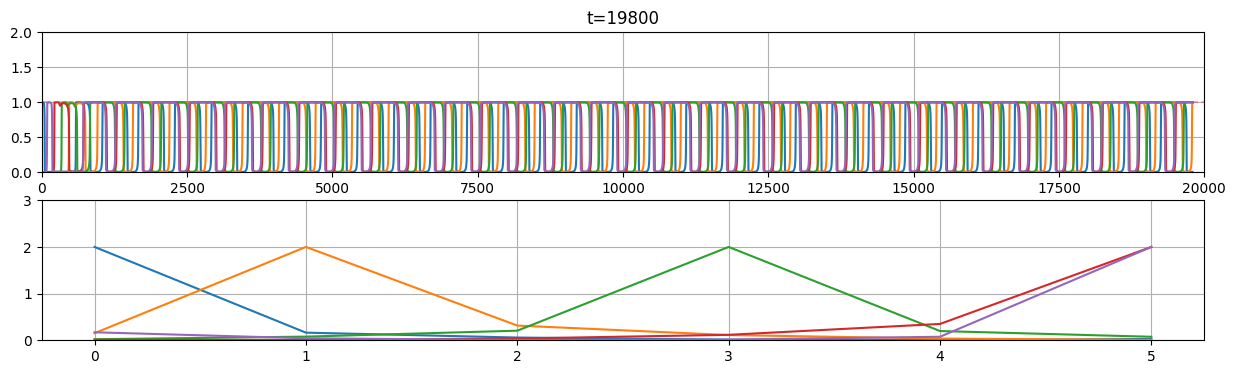

In [60]:
N = 5
T = len(X)

# neural settings
thr = 1.
u = np.ones((N, 1))*1e-8
W = np.ones((N, Nj))*1e-3
tau = 30.
lr = 0.01

# tuning
tuning = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)

# plasticity
rule = 'hebb'
beta = 10

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    u += (-u)/tau + W @ x.reshape(-1, 1) + np.exp(-(np.cos(t*0.01 + tuning) - 1)**2/0.01)
    
    # activation
    u = 1 / (1 + np.exp(-6*(u - thr)))

    # plasticity
    if rule == 'hebb':
        dw = u * x
    elif rule == 'oja':
        dw = u * x - W @ (x * x)

    W += lr * dw * (np.exp(beta*W)/np.exp(beta*W).sum(axis=1, keepdims=True))

    W = W.clip(1e-3, 2e0)

    # record
    record[t] = u.flatten()

    if t % 200 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(211)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, 2))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=}")
        
        plt.subplot(212)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), W[i])

        plt.ylim((0, 3))
        plt.grid()
        plt.pause(0.0001)

#### Lateral inhibition

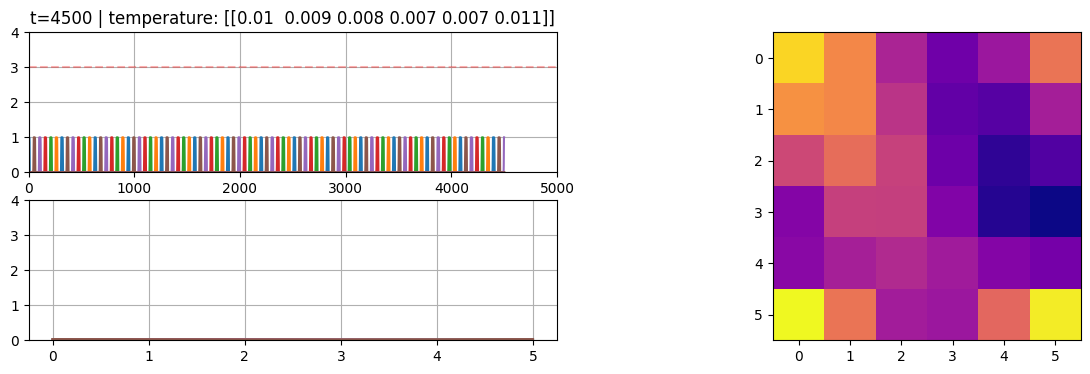

In [211]:
N = 6
T = len(X)

# neural settings
thr = 3.
u = np.ones((N, 1))*1e-8
W = np.ones((N, Nj))*1e-3
wmax = 3
tau_0 = 20.
tau = tau_0
lr = 0.01

# tuning
tuning_0 = np.linspace(0, 2*np.pi, N, endpoint=False).reshape(-1, 1)
tuning = tuning_0.copy()

# plasticity
rule = 'hebb'
beta = 10
temp = np.zeros((N, 1))

# lateral inhibition
Wr = -1 * (np.ones((N, N)) - np.eye(N))

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    u += (-u)/tau + W @ x.reshape(-1, 1) + thr * (1 - temp) * np.exp(
        - (np.cos(t*0.02 + tuning) - 1)**2/0.001) + Wr @ u #+ np.random.normal(0, 0.2, (N, 1))**2
    
    # activation
    u = 1 / (1 + np.exp(-7*(u - thr)))

    # time constant
    #tau += (1*u + tau_0*(1-u) - tau) / 2

    # temperature
    temp = (W.max(axis=1) / wmax).reshape(-1, 1)

    # weight decay
    W += (- W / 500) * (1 - temp)

    # plasticity
    if rule == 'hebb':
        dw = u * x
    elif rule == 'oja':
        dw = u * x - W @ (x * x)

    W += lr * dw * (np.exp(beta*W)/np.exp(beta*W).sum(axis=1, keepdims=True))

    W = W.clip(0., wmax)

    # record
    record[t] = u.flatten()

    if t % 500 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(221)
        plt.axhline(thr, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, thr+1))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=} | temperature: {np.around(temp.T, 3)}")
        
        plt.subplot(223)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), W[i])

        plt.ylim((0, wmax+1))
        plt.grid()

        plt.subplot(122)
        plt.imshow(W, cmap='plasma')
        plt.pause(0.0001)

## Simulation II

In [17]:
N = 6
Nj = 10

#### load model

In [1981]:
file = me.load_best_individual()
info, genome = file['info'], file['genome']
pprint(file)

2023-12-01 11:27:21 | Available files in /Users/daniekru/Research/lab/PCNN/cache:
2023-12-01 11:27:21 | 0: top_2311.json
2023-12-01 11:27:21 | 1: best_20.json
2023-12-01 11:27:21 | 2: top_2238.json
2023-12-01 11:27:21 | 3: best_8.json
2023-12-01 11:27:21 | 4: top_ij_1.json
2023-12-01 11:27:21 | 5: best_6.json
2023-12-01 11:27:21 | 6: best_7.json
2023-12-01 11:27:21 | 7: top_2239_r3.json


Choose a file:  3


2023-12-01 11:27:24 | Best individual loaded from best_8.json in /Users/daniekru/Research/lab/PCNN/cache.


{'genome': {'DA_tau': 3,
            'N': 6,
            'Nj': 6,
            'bias': 3.0,
            'bias_decay': 316,
            'bias_scale': 0.72,
            'dt': 0.053,
            'gain': 25.0,
            'lr': 0.001,
            'rule': 'hebb',
            'soft_beta': 50.0,
            'std_tuning': 0.005,
            'tau': 4.0,
            'wff_max': 3.5,
            'wff_min': 0.0,
            'wff_std': 0.001,
            'wff_tau': 300},
 'info': {'date': '01/12/2023 at 11:20',
          'game': 'Track2D(fitness_size=1)',
          'model': 'RateNetwork4'}}


**tweak**

In [2313]:
genome['N'] = 100
genome['Nj'] = 100

#### new model

In [18]:
genome = {'gain': 30.0,
 'bias': 2.5,
 'lr': 0.075,
 'tau': 10,
 'wff_std': 0.001,
 'wff_min': 0.0,
 'wff_max': 3.5,
 'wff_tau': 750,
 'rule': 'hebb',
 'std_tuning': 0.01,
 'soft_beta': 30,
 'dt': 0.00035,
 'N': N,
 'Nj': Nj,
 'DA_tau': 3,
 'bias_scale': 0.055,
 'bias_decay': 75,
}

#### settings

RateNetwork4(N=6, Nj=10, rule=hebb) [VEQkN]


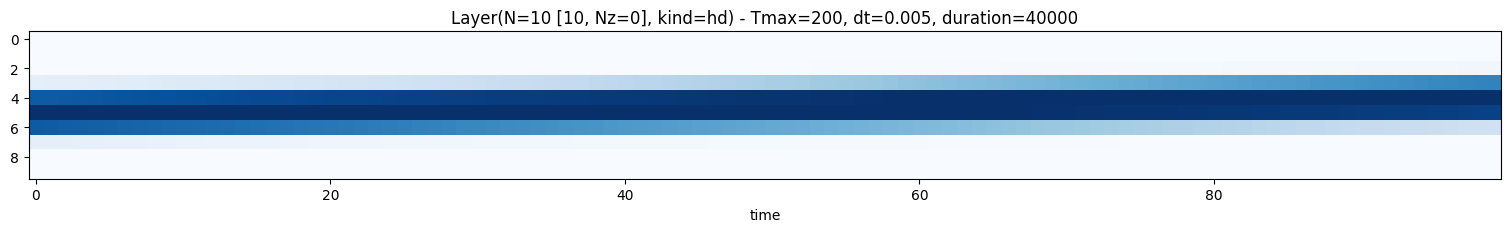

In [19]:
# model
model = mm.RateNetwork4(**genome)
logger.info(model)

N = genome['N']
Nj = genome['Nj']

# input
Tmax = 200
dt = 0.005
layer = it.HDLayer(N=Nj, sigma=0.05)
trajectory = np.arange(0, Tmax, dt)
duration = len(trajectory)
X = layer.parse_trajectory(trajectory=trajectory)
plt.figure(figsize=(19, 4))
plt.imshow(X[:100].T, cmap='Blues')
plt.xlabel('time')
plt.title(f"{layer} - {Tmax=}, {dt=}, {duration=}")
plt.show()


In [20]:
def plotting():
    clf()
    plt.figure(figsize=(20, 6))
    plt.tight_layout()

    ### input
    plt.subplot(221)
    plt.imshow(X2.T[:, t-20:t], cmap="Greys")
    plt.xticks(())
    plt.title(f"{t=}")
    plt.xlabel("ms")
    plt.grid()

    ### weights
    plt.subplot(232)
    plt.axvline(0, color='black', alpha=0.3)
    plt.axvline(model._wff_max, color='red', alpha=0.9)
    for i in range(N):
        plt.plot(np.flip(model.Wff[i], axis=0), range(Nj), '-', color=colors[i], alpha=0.3)
        plt.plot(np.flip(model.Wff[i], axis=0), range(Nj), 'o', color=colors[i], alpha=0.5)        
        plt.title(f"Weights")
    plt.yticks(())
    plt.xlim((-0.1, 5))
    plt.grid()

    ### weight matrix
    plt.subplot(233)
    plt.imshow(model.Wff.T, cmap="plasma")
    plt.title(f"Temperatures: {np.around(model.temp.flatten(), 2)}")
    plt.grid()

    ### u - DA
    plt.subplot(212)
    tm = min((t, 300))
    for i in range(N):
        plt.plot(range(t-tm, t), record[i+1, t-tm:t], color=colors[i], alpha=0.75)
        plt.plot(range(t-tm, t), Ix[i, t-tm:t], '--', color=colors[i], alpha=0.85)

    plt.fill_between(range(t-tm, t), record[0, t-tm:t], color='green', alpha=0.1, label='DA')

    #plt.plot(range(t-tm, t), record[0, t-tm:t], '--g', alpha=0.2)
    plt.ylabel(f"$u$={np.around(model.u.T[0], 1)}")
    plt.ylim((0, 4.3))
    plt.xlabel('ms')
    plt.legend()
    plt.grid()
    plt.pause(0.001)

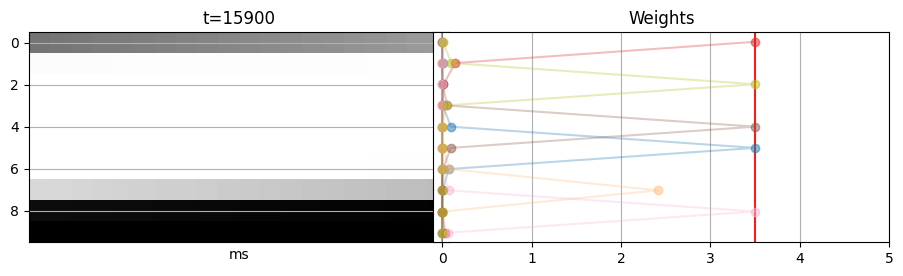

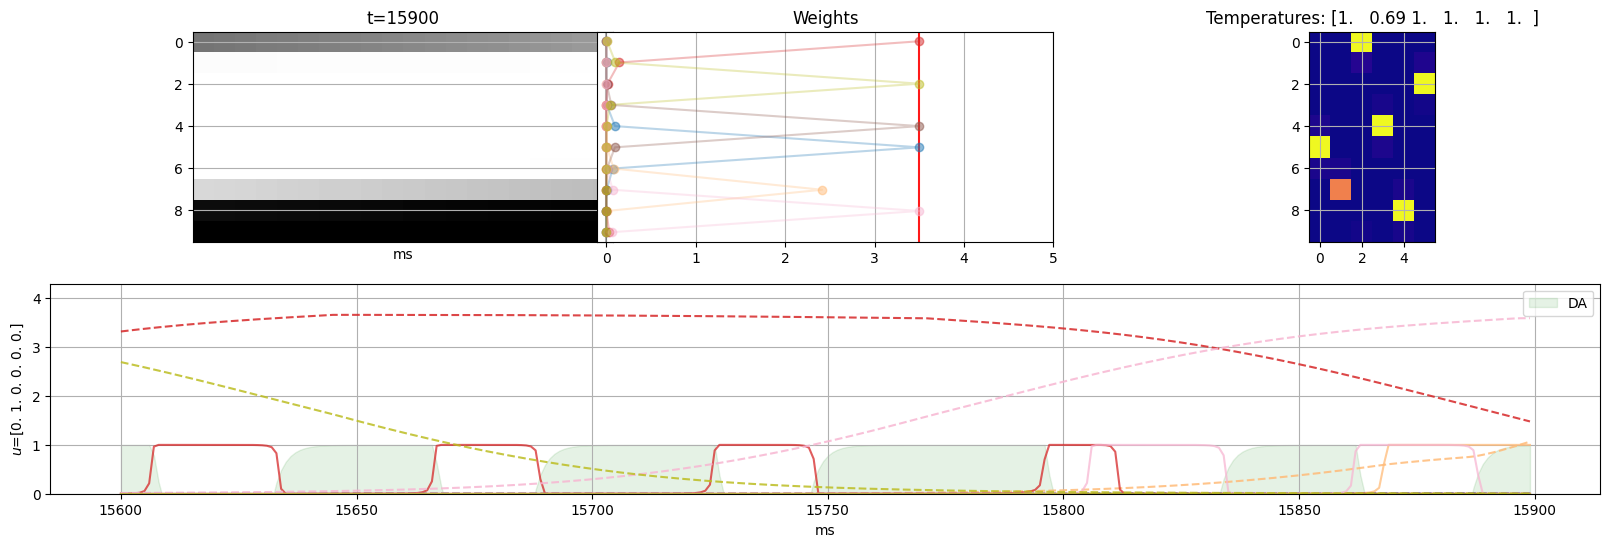

 q


In [21]:
model.reset()

record = np.zeros((N+1, len(X)))
Ix = np.zeros((N, len(X)))
X2 = np.zeros((len(X) + 10, Nj))

colors = [plt.cm.tab20(i/N) for i in range(N)]

for t, x in enumerate(X):
    try:
        model.step(x=x.reshape(-1, 1))
        record[1:, t] = model.u.flatten()
        record[0, t] = model.DA
        Ix[:, t] = model.Ix.flatten()
        
        X2[10:t+10] = X[:t]
    
        if t % 100 == 0:
            plotting()
            
    except KeyboardInterrupt:
        print('[paused]')
        clf()
        plotting()
        plt.show()
        while True:
            try:
                response = input()
                if response in ('quit', 'q', 'qq', 'c', ' '):
                    break
                print('[resume]')
                plt.show()
            except KeyboardInterrupt:
                print('[resuming...]')
                continue
        if response in ('quit', 'q', 'qq'):
            break

## Simulation III

#### Load individual

In [1239]:
file = me.load_best_individual()
info, genome = file['info'], file['genome']

2023-11-30 18:42:33 | Available files in /Users/daniekru/Research/lab/PCNN/cache:
2023-11-30 18:42:33 | 0: best_16.json
2023-11-30 18:42:33 | 1: top_2311.json
2023-11-30 18:42:33 | 2: best_3011_1756.json
2023-11-30 18:42:33 | 3: best_3011_1604.json
2023-11-30 18:42:33 | 4: best_17.json
2023-11-30 18:42:33 | 5: top_2238.json
2023-11-30 18:42:33 | 6: top_ij_1.json
2023-11-30 18:42:33 | 7: best_3011_1527.json
2023-11-30 18:42:33 | 8: best_3011_1545.json
2023-11-30 18:42:33 | 9: top_2239_r3.json
2023-11-30 18:42:33 | 10: best_3011_1641.json
2023-11-30 18:42:33 | 11: best_3011_1753.json
2023-11-30 18:42:33 | 12: best_3011_1552.json
2023-11-30 18:42:33 | 13: best_14.json
2023-11-30 18:42:33 | 14: best_3011_1554.json
2023-11-30 18:42:33 | 15: best_15.json
2023-11-30 18:42:33 | 16: best_3011_1558.json


Choose a file:  4


2023-11-30 18:42:40 | Best individual loaded from best_17.json in /Users/daniekru/Research/lab/PCNN/cache.


In [1240]:
print('Info')
pprint(info)
print('\nGenome')
pprint(genome)

model = mm.RateNetwork3(**genome)
logger.info(model)

2023-11-30 18:42:45 | RateNetwork3(N=15, Nj=6, rule=hebb) [Xm1Lj]


Info
{'date': '30/11/2023 at 18:37',
 'game': 'Track2D(fitness_size=2)',
 'model': 'RateNetwork3'}

Genome
{'N': 15,
 'Nj': 6,
 'bias': 3.0,
 'dt': 0.013,
 'gain': 9.0,
 'lr': 0.90598,
 'rule': 'hebb',
 'soft_beta': 57.4,
 'std_tuning': 0.0085,
 'tau': 18,
 'wff_max': 7.1,
 'wff_min': 0.0,
 'wff_std': 0.001,
 'wff_tau': 927}


**Tweak the model**

In [1243]:
genome['N'] = 15
genome['Nj'] = 10

model = mm.RateNetwork3(**genome)
logger.info(model)

2023-11-30 18:43:02 | RateNetwork3(N=15, Nj=10, rule=hebb) [UAGak]


#### Settings

2023-11-30 18:43:03 | InputLayer(N=10, kind=hd, sigma=1)


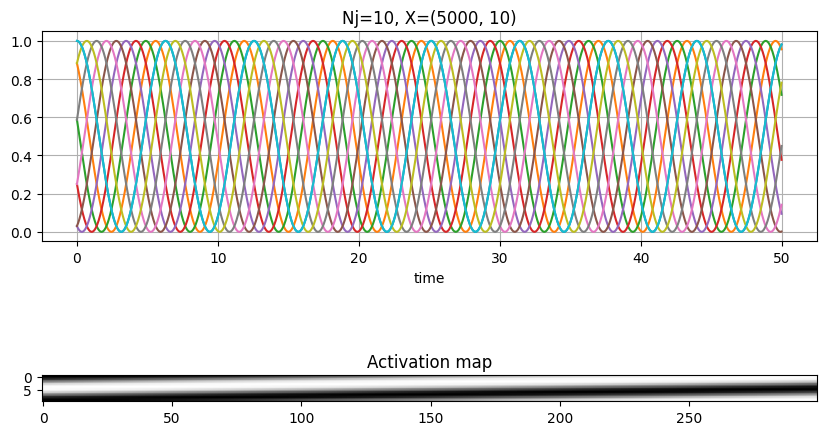

In [1244]:
N = model.N
Nj = model.Nj

# data
layer = it.InputLayer(N=Nj, kind='hd', sigma=1, max_rate=1)
logger.info(layer)

# input
X = layer.parse_trajectory(np.arange(0, 50, 0.01))
T = len(X)

# plot
plot_x(X)

#### Training

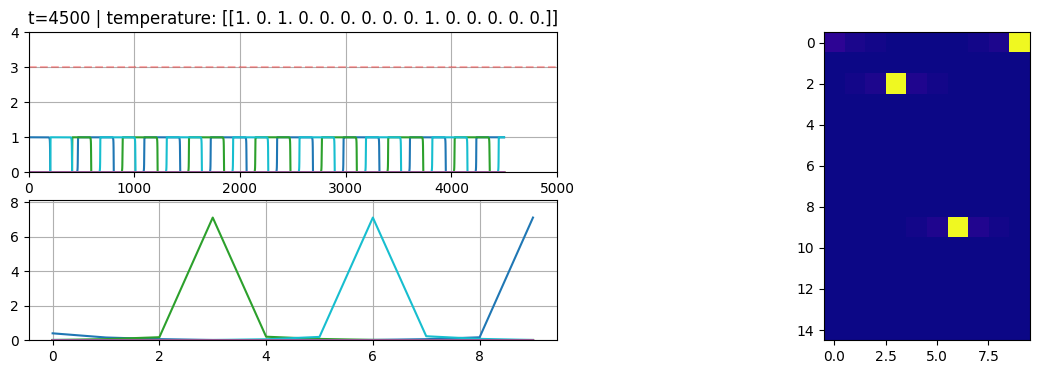

In [1245]:
model.reset()

# record
record = np.zeros((T, N))

for t, x in enumerate(X):
        
    model.step(x=x.reshape(-1, 1))

    # record
    record[t] = model.u.flatten()

    if t % 500 == 0:
        clf()
        plt.figure(figsize=(15, 4))
        plt.subplot(221)
        plt.axhline(model._bias, linestyle='--', color='red', alpha=0.3)
        for i in range(N):
            plt.plot(range(t), record[:t, i])
        plt.ylim((0, model._bias+1))
        plt.xlim((0, T))
        plt.grid()
        plt.title(f"{t=} | temperature: {np.around(model.temp.T, 3)}")
        
        plt.subplot(223)
        #plt.imshow(W, cmap='plasma')
        for i in range(N):
            plt.plot(range(Nj), model.Wff[i])

        plt.ylim((0, model._wff_max+1))
        plt.grid()

        plt.subplot(122)
        plt.imshow(model.Wff, cmap='plasma')
        plt.pause(0.0001)

In [1223]:
W = model.Wff.copy()
np.around(W)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [1227]:
np.around(W.max(axis=0))

array([3., 0., 0., 0., 1.])

In [994]:
# only one top value per row
sorted_rows = np.sort(W, axis=1)
print(np.around(sorted_rows, 3))
value_2 = sorted_rows[:, -1:].sum() - sorted_rows[:, :-1].sum()
print(sorted_rows[:, -1:].sum(), sorted_rows[:, :-1].sum())

[[3. 3. 3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
3.0000000005433463 15.000000001388582


In [996]:
W.sum(axis=1)

array([1.80000000e+01, 8.76305697e-11, 1.53807084e-11, 2.67925019e-12,
       4.66713862e-13, 1.82577055e-09])

In [992]:
# only one top value per column
sorted_cols = np.sort(W, axis=0)
print(np.around(sorted_cols, 3))
value_1 = sorted_cols[-1:, :].sum() - sorted_cols[:-1, :].sum()
print(sorted_cols[-1:, :].sum(), sorted_cols[:-1, :].sum())

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3.]]
18.0 1.931927795904259e-09


In [1006]:
-((W.sum(axis=1) - 3.)**2).sum()

-269.99999998840843

In [1059]:
import numpy as np

# Example usage
matrix = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 1, 0]
])

n = matrix.shape[0]
sorted_matrix = np.zeros_like(matrix)
max_indices = np.argmax(matrix, axis=1)

for row in range(n):
    sorted_matrix[row, row] = matrix[row, max_indices[row]]

print(sorted_matrix)


[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [1109]:
W = model.Wff.copy()
np.around(W, 2)

array([[2.5 , 0.05, 0.01, 0.01, 0.06, 0.22],
       [0.01, 0.  , 0.04, 2.5 , 0.11, 0.01],
       [0.01, 0.  , 0.04, 2.5 , 0.1 , 0.01],
       [0.01, 0.  , 0.03, 2.5 , 0.09, 0.01],
       [0.04, 2.5 , 0.09, 0.01, 0.  , 0.04],
       [0.01, 0.  , 0.04, 2.5 , 0.1 , 0.01],
       [0.01, 0.  , 0.03, 2.5 , 0.09, 0.01],
       [0.06, 2.5 , 0.06, 0.  , 0.01, 0.06],
       [0.01, 0.06, 2.5 , 0.06, 0.01, 0.  ],
       [0.06, 0.  , 0.01, 0.06, 2.5 , 0.06]])

In [1116]:
I, J = W.shape
sorted_matrix = np.zeros_like(W)
max_indices = np.argmax(W, axis=1)

for i in range(I):
    sorted_matrix[i, min((i, J-1))] = W[i, max_indices[i]]
        
target = 3. * np.eye(I)[:, :J]
value_3 = -((sorted_matrix - target)**2).sum() / (I*J)


In [1111]:
target

array([[3., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 3.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [1113]:
sorted_matrix

array([[2.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 2.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 2.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 2.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 2.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 2.5],
       [0. , 0. , 0. , 0. , 0. , 2.5],
       [0. , 0. , 0. , 0. , 0. , 2.5],
       [0. , 0. , 0. , 0. , 0. , 2.5],
       [0. , 0. , 0. , 0. , 0. , 2.5]])

In [1171]:
np.eye(5, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])